In [1]:
import sys
sys.path.append("../../scxmatch/src/")
from scxmatch import *
import anndata as ad
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import string
import scanpy as sc

will use the CPU to calculate the distance matrix.


In [28]:
def discrete_level(x, levels=[1, 0.1, 0.05, 0.01, 0.001]):
    for i, level in enumerate(levels[1:]):
        if x > level:
            return i / (len(levels) - 1) 
    return (i + 1) / (len(levels) - 1)     

In [2]:
k=100

In [3]:
bhatt_adata = ad.read_h5ad("/data/bionets/datasets/scrnaseq_ji/bhattacherjee.hdf5")
scanpy_setup(bhatt_adata)

/data/bionets/je30bery/conda/envs/gt-292/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


AnnData object with n_obs × n_vars = 12936 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'percent.mito', 'replicate', 'Period', 'label', 'cell_type', 'subtype'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [4]:
reference="Maintenance_Cocaine"
test_groups = ["withdraw_48h_Cocaine", "withdraw_15d_Cocaine"]
bhatt_adata_48 = bhatt_adata[bhatt_adata.obs["label"].isin([test_groups[0], reference])]
bhatt_adata_15 = bhatt_adata[bhatt_adata.obs["label"].isin([test_groups[1], reference])]

In [5]:
kang_adata = ad.read_h5ad("/data/bionets/datasets/scrnaseq_ji/kang_2018.hdf5")
kang_adata = scanpy_setup(kang_adata)

/data/bionets/je30bery/conda/envs/gt-292/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [6]:
p_vals = dict()
mses = dict()
for cell_type in tqdm(kang_adata.obs["cell_type"].unique()):
    subset = kang_adata[kang_adata.obs["cell_type"] == cell_type]
    p, _, s = rosenbaum(subset, group_by="condition", reference="control", test_group="stimulated", k=k, return_matching=False, metric="sqeuclidean")      
    p_vals[cell_type] = p
    control_mean = np.array(np.mean(subset[subset.obs["condition"] == "control"].X.todense(), axis=0))[0]
    test_mean = np.array(np.mean(subset[subset.obs["condition"] == "stimulated"].X.todense(), axis=0))[0]
    mse = np.mean((control_mean - test_mean) ** 2)
    mses[cell_type] = mse

  0%|                                                                                                                                                                                                                                                                                      | 0/8 [00:00<?, ?it/s]

XMatch_group
reference    2932
test         2765
Name: count, dtype: int64
calculating kNN graph.


/data/bionets/je30bery/conda/envs/gt-292/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 12%|█████████████████████████████████▊                                                                                                                                                                                                                                            | 1/8 [00:33<03:53, 33.40s/it]

counting cross matches.
XMatch_group
test         5678
reference    5560
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 25%|███████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                          | 2/8 [01:49<05:50, 58.41s/it]

XMatch_group
test         271
reference    258
Name: count, dtype: int64
calculating kNN graph.


 38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                        | 3/8 [01:51<02:43, 32.70s/it]

counting cross matches.
XMatch_group
test         861
reference    855
Name: count, dtype: int64
calculating kNN graph.


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                       | 4/8 [02:03<01:38, 24.55s/it]

counting cross matches.
XMatch_group
reference    811
test         810
Name: count, dtype: int64
calculating kNN graph.


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 5/8 [02:12<00:56, 18.77s/it]

counting cross matches.
XMatch_group
test         1335
reference    1316
Name: count, dtype: int64
calculating kNN graph.


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 6/8 [02:38<00:43, 21.55s/it]

counting cross matches.
XMatch_group
test         569
reference    520
Name: count, dtype: int64
calculating kNN graph.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:42<00:00, 20.28s/it]

counting cross matches.
XMatch_group
test         69
reference    63
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


In [7]:
mean_augur_auc = {'CD14+ Monocytes': 0.920476, 
                  'CD4 T cells': 0.669376, 
                  'Dendritic cells': 0.847007,
                  'NK cells': 0.673299, 
                  'CD8 T cells': 0.626247,
                  'B cells': 0.783628, 
                  'FCGR3A+ Monocytes': 0.888934, 
                  'Megakaryocytes': 0.512619}

In [8]:
kang_df = pd.DataFrame(mean_augur_auc.keys(), columns=["Cell type"])

In [9]:
kang_df["p"] = kang_df["Cell type"].apply(lambda x: p_vals[x])
kang_df["MSE"] = kang_df["Cell type"].apply(lambda x: mses[x])
kang_df["Mean Augur AUC"] = kang_df["Cell type"].apply(lambda x: mean_augur_auc[x])

In [10]:
p_vals = dict()
mses = dict()
group_by = "label"
reference="Maintenance_Cocaine"

for test_group in test_groups:
    p_vals[test_group] = dict()
    mses[test_group] = dict()

    
    for cell_type in tqdm(bhatt_adata.obs["cell_type"].unique()):
        subset = bhatt_adata[bhatt_adata.obs["cell_type"] == cell_type]
        p, z, s = rosenbaum(subset, group_by="label", reference=reference, test_group=test_group, k=k, return_matching=False, metric="sqeuclidean")      
        p_vals[test_group][cell_type] = p
        control_mean = np.array(np.mean(subset[subset.obs[group_by] == reference].X.todense(), axis=0))[0]
        test_mean = np.array(np.mean(subset[subset.obs[group_by] == test_group].X.todense(), axis=0))[0]
        mse = np.mean((control_mean - test_mean) ** 2)
        mses[test_group][cell_type] = mse

  0%|                                                                                                                                                                                                                                                                                      | 0/8 [00:00<?, ?it/s]

XMatch_group
test         270
reference    216
Name: count, dtype: int64
calculating kNN graph.


 12%|█████████████████████████████████▊                                                                                                                                                                                                                                            | 1/8 [00:11<01:20, 11.46s/it]

counting cross matches.
XMatch_group
reference    373
test         302
Name: count, dtype: int64
calculating kNN graph.


 25%|███████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                          | 2/8 [00:32<01:44, 17.39s/it]

counting cross matches.
XMatch_group
test         1688
reference    1264
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 38%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                        | 3/8 [05:23<11:49, 141.99s/it]

XMatch_group
reference    478
test         477
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                      | 4/8 [06:07<06:53, 103.41s/it]

XMatch_group
reference    409
test         147
Name: count, dtype: int64
calculating kNN graph.


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 5/8 [06:21<03:33, 71.19s/it]

counting cross matches.
XMatch_group
test         227
reference    119
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 6/8 [06:27<01:38, 49.03s/it]

XMatch_group
test         182
reference     82
Name: count, dtype: int64
calculating kNN graph.


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 7/8 [06:29<00:33, 33.47s/it]

counting cross matches.
XMatch_group
test         44
reference    35
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


  0%|                                                                                                                                                                                                                                                                                      | 0/8 [00:00<?, ?it/s]

XMatch_group
reference    216
test         213
Name: count, dtype: int64
calculating kNN graph.


 12%|█████████████████████████████████▊                                                                                                                                                                                                                                            | 1/8 [00:08<01:01,  8.83s/it]

counting cross matches.
XMatch_group
reference    373
test          99
Name: count, dtype: int64
calculating kNN graph.


 25%|███████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                          | 2/8 [00:12<00:34,  5.76s/it]

counting cross matches.
XMatch_group
test         4789
reference    1264
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                        | 3/8 [01:03<02:11, 26.24s/it]

XMatch_group
test         753
reference    478
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                       | 4/8 [02:09<02:48, 42.11s/it]

XMatch_group
reference    409
test         240
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 5/8 [02:28<01:40, 33.63s/it]

XMatch_group
reference    119
test          71
Name: count, dtype: int64
calculating kNN graph.


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 6/8 [02:29<00:45, 22.57s/it]

counting cross matches.
XMatch_group
test         357
reference     82
Name: count, dtype: int64
calculating kNN graph.


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 7/8 [02:38<00:18, 18.31s/it]

counting cross matches.
XMatch_group
test         101
reference     35
Name: count, dtype: int64
calculating kNN graph.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:39<00:00, 19.92s/it]

counting cross matches.


In [11]:
aug_auc_15d = {"Oligo":         0.801417,
                "Astro":         0.769116,
                "Microglia":     0.743707,
                "OPC":           0.743605,
                "Inhibitory":    0.656202,
                "NF Oligo":      0.625692,
                "Excitatory":    0.623923,
                "Endo":          0.588481}

In [12]:
aug_auc_48h = {"Astro":         0.624898,
                "OPC":           0.598050,
                "NF Oligo":      0.592619,
                "Microglia":     0.587789,
                "Inhibitory":    0.560000,
                "Oligo":         0.557630,
                "Endo":          0.540272,
                "Excitatory":    0.527143}

In [13]:
bhat_df_48 = pd.DataFrame(aug_auc_15d.keys(), columns=["Cell type"])
bhat_df_15 = pd.DataFrame(aug_auc_15d.keys(), columns=["Cell type"])

In [14]:
bhat_df_48["p"] = bhat_df_48["Cell type"].apply(lambda x: p_vals["withdraw_48h_Cocaine"][x])
bhat_df_15["p"] = bhat_df_15["Cell type"].apply(lambda x: p_vals["withdraw_15d_Cocaine"][x])
bhat_df_48["MSE"] = bhat_df_48["Cell type"].apply(lambda x: mses["withdraw_48h_Cocaine"][x])
bhat_df_15["MSE"] = bhat_df_15["Cell type"].apply(lambda x: mses["withdraw_15d_Cocaine"][x])

In [15]:
bhat_df_48["Mean Augur AUC"] =  bhat_df_48["Cell type"].apply(lambda x: aug_auc_48h[x])
bhat_df_15["Mean Augur AUC"] =  bhat_df_15["Cell type"].apply(lambda x: aug_auc_15d[x])

In [16]:
pal = sns.color_palette("colorblind", len(kang_adata.obs["cell_type"].unique()))
pal_ct = {ct: pal[i] for i, ct in enumerate(kang_adata.obs["cell_type"].unique())}

pal = sns.color_palette("colorblind", len(bhatt_adata_48.obs["cell_type"].unique()))
pal_ct_48 = {ct: pal[i] for i, ct in enumerate(bhatt_adata_48.obs["cell_type"].unique())}

pal = sns.color_palette("colorblind", len(bhatt_adata_15.obs["cell_type"].unique()))
pal_ct_15 = {ct: pal[i] for i, ct in enumerate(bhatt_adata_15.obs["cell_type"].unique())}

In [18]:
pal1 = {"Control": "grey", "Stimulated": "black"}
pal2 = {"Maint. cocaine": "grey", "Withdraw 48h": "black", "Withdraw 15d": "black"}

In [29]:
bhat_df_48["log(p + 1)"] = np.log1p(bhat_df_48["p"])
bhat_df_15["log(p + 1)"] = np.log1p(bhat_df_15["p"])

In [30]:
kang_df["log(p + 1)"] = np.log1p(kang_df["p"])

In [31]:
kang_df

,Cell type,p,MSE,Mean Augur AUC,log(p),log(p + 1)
0,CD14+ Monocytes,0.000000e+00,0.064307,0.920476,-inf,0.000000e+00
1,CD4 T cells,0.000000e+00,0.004275,0.669376,-inf,0.000000e+00
2,Dendritic cells,1.778156e-75,0.053486,0.847007,-172.118305,1.778156e-75
3,NK cells,4.257554e-171,0.006113,0.673299,-392.293356,4.257554e-171
4,CD8 T cells,2.122893e-147,0.004156,0.626247,-337.727229,2.122893e-147
5,B cells,0.000000e+00,0.007705,0.783628,-inf,0.000000e+00
6,FCGR3A+ Monocytes,7.529781e-147,0.049818,0.888934,-336.461143,7.529781e-147
7,Megakaryocytes,5.799778e-01,0.000610,0.512619,-0.544765,4.574108e-01


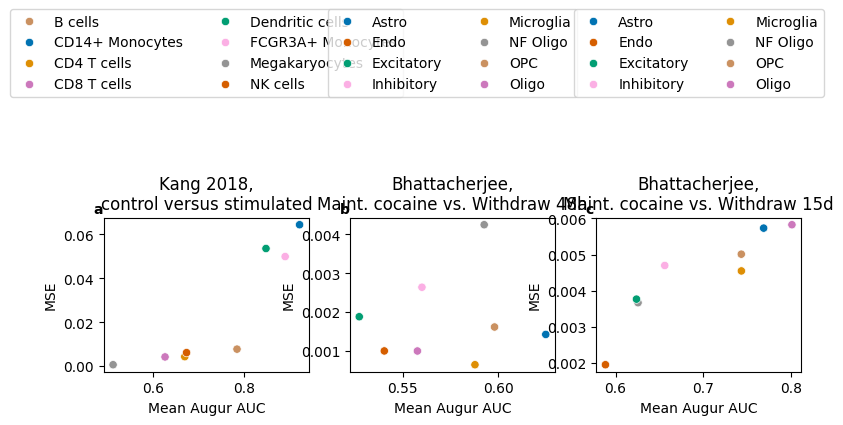

In [34]:
f, axs = plt.subplots(1, 3, figsize=(9, 2))

s = 10
sns.scatterplot(kang_df, x="Mean Augur AUC", y="MSE", hue="Cell type", ax=axs[0], hue_order=sorted(kang_df["Cell type"].unique()), palette=pal_ct)
sns.scatterplot(bhat_df_48, x="Mean Augur AUC", y="MSE", hue="Cell type", ax=axs[1], hue_order=sorted(bhat_df_48["Cell type"].unique()), palette=pal_ct_48)
sns.scatterplot(bhat_df_15, x="Mean Augur AUC", y="MSE", hue="Cell type", ax=axs[2], hue_order=sorted(bhat_df_15["Cell type"].unique()), palette=pal_ct_15)

axs[0].set_title("Kang 2018,\ncontrol versus stimulated")
axs[1].set_title(f"Bhattacherjee,\nMaint. cocaine vs. Withdraw 48h")
axs[2].set_title(f"Bhattacherjee,\nMaint. cocaine vs. Withdraw 15d")

axs[0].legend(ncols=len(mean_augur_auc) // 4, loc='upper center', bbox_to_anchor=(0.5, 2.4))
axs[1].legend(ncols=len(aug_auc_48h) // 4, loc='upper center', bbox_to_anchor=(0.5, 2.4))
axs[2].legend(ncols=len(aug_auc_15d) // 4, loc='upper center', bbox_to_anchor=(0.5, 2.4))

labels = string.ascii_lowercase  
for i in range(np.prod(axs.shape)):
    axs[i].text(
        -0.05, 1.1,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axs[i].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )
    
#plt.tight_layout()
#plt.savefig("augur_figure.pdf")

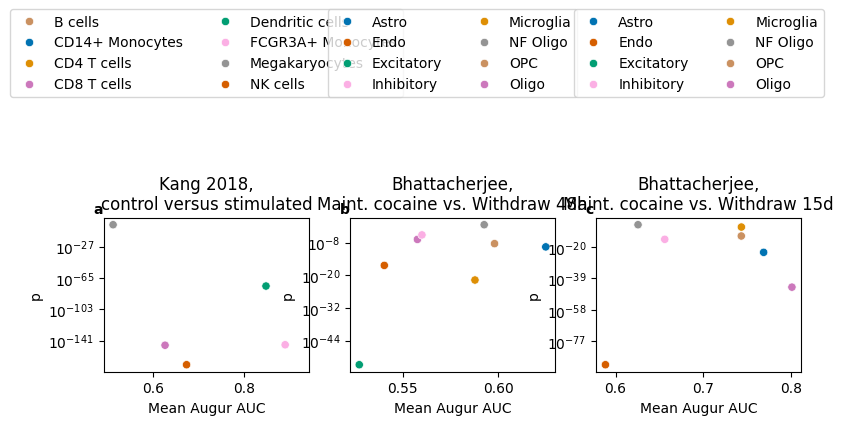

In [38]:
f, axs = plt.subplots(1, 3, figsize=(9, 2))

s = 10
sns.scatterplot(kang_df, x="Mean Augur AUC", y="p", hue="Cell type", ax=axs[0], hue_order=sorted(kang_df["Cell type"].unique()), palette=pal_ct)
sns.scatterplot(bhat_df_48, x="Mean Augur AUC", y="p", hue="Cell type", ax=axs[1], hue_order=sorted(bhat_df_48["Cell type"].unique()), palette=pal_ct_48)
sns.scatterplot(bhat_df_15, x="Mean Augur AUC", y="p", hue="Cell type", ax=axs[2], hue_order=sorted(bhat_df_15["Cell type"].unique()), palette=pal_ct_15)

axs[0].set_title("Kang 2018,\ncontrol versus stimulated")
axs[1].set_title(f"Bhattacherjee,\nMaint. cocaine vs. Withdraw 48h")
axs[2].set_title(f"Bhattacherjee,\nMaint. cocaine vs. Withdraw 15d")

axs[0].legend(ncols=len(mean_augur_auc) // 4, loc='upper center', bbox_to_anchor=(0.5, 2.4))
axs[1].legend(ncols=len(aug_auc_48h) // 4, loc='upper center', bbox_to_anchor=(0.5, 2.4))
axs[2].legend(ncols=len(aug_auc_15d) // 4, loc='upper center', bbox_to_anchor=(0.5, 2.4))

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

labels = string.ascii_lowercase  
for i in range(np.prod(axs.shape)):
    axs[i].text(
        -0.05, 1.1,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axs[i].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )
    
#plt.tight_layout()
#plt.savefig("augur_figure.pdf")

<Axes: xlabel='MSE', ylabel='log(p)'>

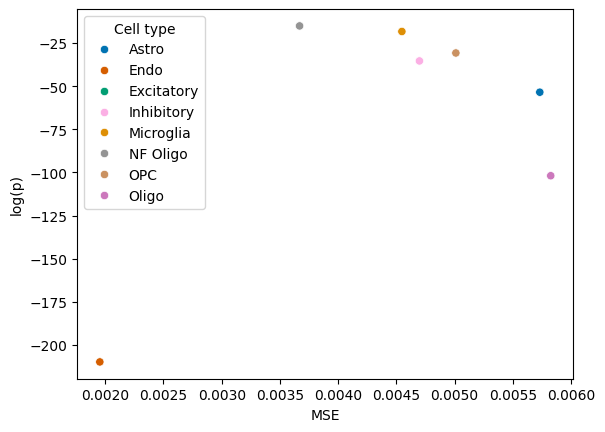

In [47]:
f, ax = plt.subplots(1)
sns.scatterplot(bhat_df_15, x="MSE", y="log(p)", hue="Cell type", hue_order=sorted(bhat_df_15["Cell type"].unique()), palette=pal_ct_15, ax=ax)

In [44]:
bhat_df_15

,Cell type,p,MSE,Mean Augur AUC,log(p),log(p + 1)
0,Oligo,5.339807e-45,0.005825,0.801417,-101.941140,5.339807e-45
1,Astro,5.737652e-24,0.005731,0.769116,-53.514992,5.737652e-24
2,Microglia,1.106536e-08,0.004547,0.743707,-18.319447,1.106536e-08
3,OPC,4.308243e-14,0.005010,0.743605,-30.775661,4.308243e-14
4,Inhibitory,4.251004e-16,0.004697,0.656202,-35.394206,4.251004e-16
5,NF Oligo,2.793801e-07,0.003669,0.625692,-15.090693,2.793801e-07
6,Excitatory,0.000000e+00,0.003767,0.623923,-inf,0.000000e+00
7,Endo,7.079529e-92,0.001954,0.588481,-209.880621,7.079529e-92
